In [144]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline

In [145]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/vatsal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vatsal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/vatsal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [146]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

In [147]:
reviews = pd.read_excel("../../data/Canva_reviews.xlsx")

In [148]:
reviews.head()

,reviewId,userName,userImage,review,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Sentiment,Sub Category,Sub Category_test
0,gp:AOqpTOFxf3fttcT5DSvFIn9KPp5FErgH9yC533Fmoxv...,Donna Caritero,https://play-lh.googleusercontent.com/a-/AOh14...,Overall it's really an amazing app. I've been ...,4,528,2.116.0,2021-06-17 07:18:54,Hi Donna. We are sorry that your text or desig...,2021-06-19 21:24:32,Negative,NaN,bug_picture_quality
1,gp:AOqpTOEq6rNIWLnPV4KFTctWvm0mpGEQljtD6mvy1H-...,Soumi Mukhopadhyay,https://play-lh.googleusercontent.com/a-/AOh14...,Hey! Yes I gave a 5 star rating... coz I belie...,5,351,2.116.0,2021-06-17 19:18:28,NaN,NaT,Positive,extremely_happy,NaN
2,gp:AOqpTOE86hSyPRHZgYt28Uk5zGe4FZGb1hkmtFDiYJ2...,Theknown _unknown,https://play-lh.googleusercontent.com/a-/AOh14...,Canva used to be a good app! But recently I've...,1,160,2.116.0,2021-06-23 19:13:28,Hi there. We're sorry to hear that you are hav...,2021-06-26 20:20:56,Negative,saving_downloading_issue,bug_saving_files
3,gp:AOqpTOHSuKkVTcM3QgCCKysHQlxEnk2ocOKsUMiMIJy...,Anthony Dean,https://play-lh.googleusercontent.com/a/AATXAJ...,"It's a brilliant app, but I have just one prob...",5,145,2.116.0,2021-06-19 23:36:07,NaN,NaT,Negative,others,bug_app_crash
4,gp:AOqpTOEOrZt5H6jXPiplJyffCd5ZBnVXACTWgwNsF1R...,Neha Diana Wesley,https://play-lh.googleusercontent.com/a-/AOh14...,This was such a great app. I used to make BTS ...,4,142,2.116.0,2021-06-21 00:29:27,Hi Neha. Sorry to hear that you are unable to ...,2021-06-24 20:46:28,Negative,others,bug_other


In [149]:
reviews.loc[13, "review"]

'Unable to save my work. Nothing works :('

In [150]:
reviews.loc[13, "Sentiment"]

'Negative'

In [151]:
reviews.loc[1495, "review"], reviews.loc[1495, "Sentiment"]

('Absolutely amazing and a lifesaver for teachers.', 'Positive')

<Axes: xlabel='Sentiment', ylabel='count'>

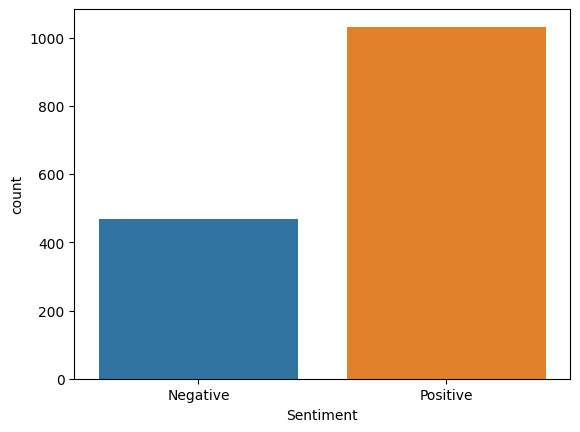

In [152]:
sns.countplot(x="Sentiment", data=reviews)

In [153]:
reviews["Sentiment"].value_counts(normalize=True)*100

Sentiment
Positive    68.8
Negative    31.2
Name: proportion, dtype: float64

<Axes: xlabel='score', ylabel='count'>

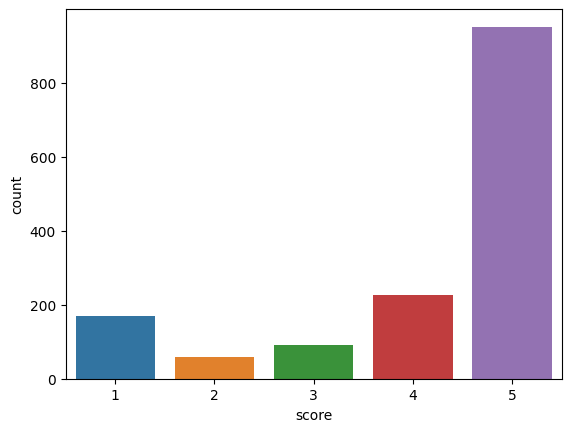

In [154]:
sns.countplot(x="score", data=reviews)

<Axes: xlabel='score', ylabel='count'>

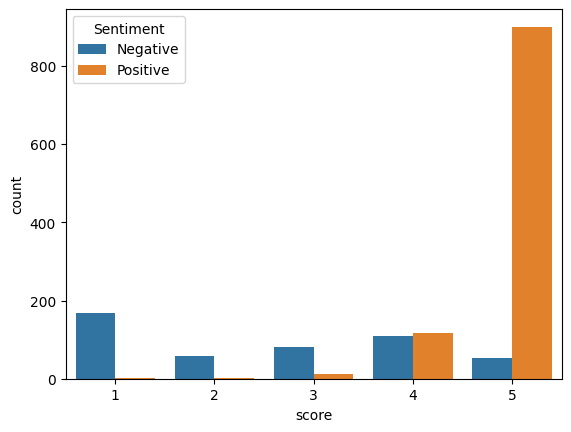

In [155]:
sns.countplot(x="score", hue="Sentiment", data=reviews)

In [156]:
reviews["length"] = reviews["review"].apply(len)

In [157]:
reviews["length"].describe()

count    1500.000000
mean       86.468667
std        55.681355
min        20.000000
25%        54.000000
50%        75.000000
75%       102.000000
max       498.000000
Name: length, dtype: float64

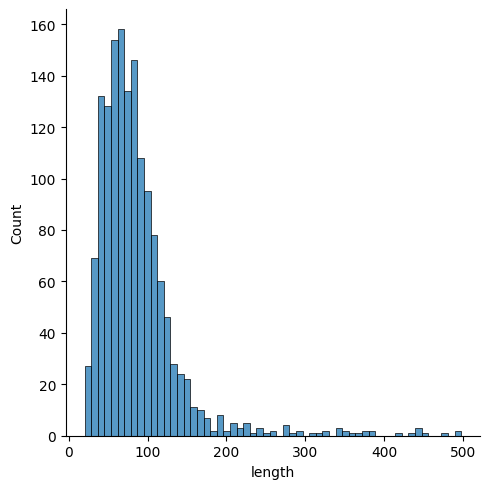

In [158]:
sns.displot(reviews["length"])

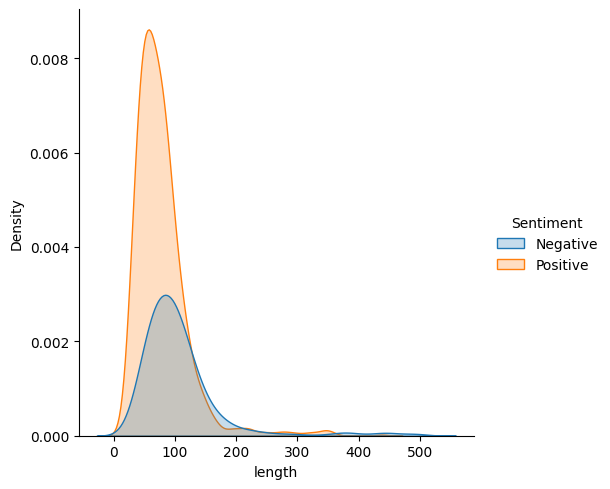

In [159]:
sns.displot(data=reviews, x="length", hue="Sentiment", kind="kde", fill=True)

In [160]:
reviews = reviews[["review", "Sentiment"]]
reviews.head()

,review,Sentiment
0,Overall it's really an amazing app. I've been ...,Negative
1,Hey! Yes I gave a 5 star rating... coz I belie...,Positive
2,Canva used to be a good app! But recently I've...,Negative
3,"It's a brilliant app, but I have just one prob...",Negative
4,This was such a great app. I used to make BTS ...,Negative


In [161]:
reviews.loc[13, ["review", "Sentiment"]]

review       Unable to save my work. Nothing works :(
Sentiment                                    Negative
Name: 13, dtype: object

In [162]:
sent_tokenize(reviews.loc[13, "review"]), "\n", sent_tokenize(reviews.loc[1495, "review"])

(['Unable to save my work.', 'Nothing works :('],
 '\n',
 ['Absolutely amazing and a lifesaver for teachers.'])

In [163]:
word_tokenize(reviews.loc[13, "review"]), word_tokenize(reviews.loc[1495, "review"])

(['Unable', 'to', 'save', 'my', 'work', '.', 'Nothing', 'works', ':', '('],
 ['Absolutely', 'amazing', 'and', 'a', 'lifesaver', 'for', 'teachers', '.'])

In [164]:
reviews["review"] = reviews["review"].apply(str.lower)

In [165]:
reviews.loc[13, ["review", "Sentiment"]]

review       unable to save my work. nothing works :(
Sentiment                                    Negative
Name: 13, dtype: object

In [166]:
sw = stopwords.words("english")
tokenizer = RegexpTokenizer(r'[A-z]+')

In [167]:
import re

In [168]:
def perform_tokenize(sentence):
    
    words = word_tokenize(sentence)

    words_wo_punctuation = ["".join(tokenizer.tokenize(x)) for x in words if len(tokenizer.tokenize(x))>0]

    words_wo_stopwords = [word for word in words_wo_punctuation if word not in sw]

    return words_wo_stopwords

In [169]:
i = 1495
reviews.loc[i, "review"],

('absolutely amazing and a lifesaver for teachers.',)

In [170]:
print(perform_tokenize(reviews.loc[i, "review"]))

['absolutely', 'amazing', 'lifesaver', 'teachers']


In [171]:
reviews["review"] = reviews["review"].apply(perform_tokenize)

In [172]:
reviews["review"]

0       [overall, really, amazing, app, using, past, y...
1       [hey, yes, gave, star, rating, coz, believe, d...
2       [canva, used, good, app, recently, facing, iss...
3       [brilliant, app, one, problem, editing, post, ...
4       [great, app, used, make, bts, memes, recent, u...
                              ...                        
1495           [absolutely, amazing, lifesaver, teachers]
1496    [nice, many, times, shows, error, opening, ppt...
1497    [much, lag, always, stuck, starting, page, wor...
1498    [nice, app, college, work, many, features, tem...
1499                  [teacher, much, school, year, love]
Name: review, Length: 1500, dtype: object

In [173]:
porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer(language="english")

In [174]:
porter.stem("goes")

'goe'

In [175]:
lancaster.stem("goes")

'goe'

In [176]:
snowball.stem("goes")

'goe'

In [177]:
def perform_stemming(stem_type,input):

    if stem_type not in ["porter", "lancaster", "snowball"] :
        stem_type = "porter"

    if stem_type == "porter":
        words_stemmed = [porter.stem(word) for word in input]
    elif stem_type == "lancaster":
        words_stemmed = [lancaster.stem(word) for word in input]
    elif stem_type == "snowball":
        words_stemmed = [snowball.stem(word) for word in input]

    return words_stemmed

In [178]:
perform_stemming("porter",reviews.loc[i, "review"]), perform_stemming("lancaster",reviews.loc[i, "review"]), perform_stemming("snowball",reviews.loc[i, "review"])

(['absolut', 'amaz', 'lifesav', 'teacher'],
 ['absolv', 'amaz', 'lifesav', 'teach'],
 ['absolut', 'amaz', 'lifesav', 'teacher'])

In [179]:
reviews["review"].apply(lambda x: perform_stemming("porter", x))

0       [overal, realli, amaz, app, use, past, year, h...
1       [hey, ye, gave, star, rate, coz, believ, deser...
2       [canva, use, good, app, recent, face, issu, sa...
3       [brilliant, app, one, problem, edit, post, dou...
4       [great, app, use, make, bt, meme, recent, upda...
                              ...                        
1495                    [absolut, amaz, lifesav, teacher]
1496    [nice, mani, time, show, error, open, ppt, sch...
1497    [much, lag, alway, stuck, start, page, worst, ...
1498    [nice, app, colleg, work, mani, featur, templa...
1499                  [teacher, much, school, year, love]
Name: review, Length: 1500, dtype: object

In [180]:
reviews["review"] = reviews["review"].apply(lambda x: perform_stemming("porter", x))

In [181]:
counts = Counter(reviews.explode(column="review")["review"].to_list())

In [182]:
counts

Counter({'app': 932,
         'use': 474,
         'design': 349,
         'easi': 293,
         'love': 220,
         'good': 219,
         'edit': 191,
         'make': 190,
         'great': 184,
         'canva': 173,
         'best': 165,
         'nt': 159,
         'work': 145,
         'realli': 129,
         'creat': 117,
         'help': 113,
         'amaz': 110,
         'free': 110,
         'like': 109,
         'time': 104,
         'download': 104,
         'save': 103,
         'templat': 103,
         'nice': 102,
         'mani': 91,
         'thank': 84,
         'logo': 82,
         'lot': 80,
         'much': 78,
         'graphic': 73,
         'one': 71,
         'featur': 71,
         'video': 71,
         'option': 70,
         'awesom': 68,
         'pleas': 66,
         'need': 65,
         'even': 63,
         'tri': 62,
         'applic': 59,
         'get': 57,
         'problem': 55,
         'photo': 55,
         'take': 54,
         'ca': 54,
         

In [183]:
len(counts)

1656

In [184]:
counts.most_common(10)

[('app', 932),
 ('use', 474),
 ('design', 349),
 ('easi', 293),
 ('love', 220),
 ('good', 219),
 ('edit', 191),
 ('make', 190),
 ('great', 184),
 ('canva', 173)]

In [187]:
word_list = reviews.explode(column="review")["review"].to_list()

In [189]:
print(word_list), len(word_list)

['overal', 'realli', 'amaz', 'app', 'use', 'past', 'year', 'howev', 'one', 'issu', 'though', 'want', 'get', 'address', 'sinc', 'think', 'issu', 'last', 'mani', 'year', 'text', 'blur', 'zoom', 'pixel', 'thought', 'issu', 'occur', 'mobil', 'app', 'howev', 'also', 'present', 'websit', 'pleas', 'fix', 'still', 'rememb', 'time', 'export', 'high', 'definit', 'text', 'love', 'experi', 'thank', 'hey', 'ye', 'gave', 'star', 'rate', 'coz', 'believ', 'deserv', 'mostli', 'use', 'desktop', 'version', 'serious', 'satisfi', 'app', 'android', 'desktop', 'version', 'came', 'thank', 'develop', 'beauti', 'app', 'facil', 'liter', 'find', 'almost', 'everyth', 'need', 'best', 'part', 'even', 'without', 'premium', 'featur', 'provid', 'us', 'lot', 'mani', 'facil', 'love', 'thank', 'canva', 'use', 'good', 'app', 'recent', 'face', 'issu', 'save', 'file', 'want', 'file', 'save', 'png', 'format', 'get', 'save', 'jpg', 'format', 'moreov', 'want', 'file', 'save', 'get', 'stuck', 'download', 'screen', 'call', 'magic

(None, 13311)

In [190]:
word_set = set(word_list)
len(word_set)

1656

### Bag of Words

In [191]:
def word_join(words):
    
    return " ".join(words)


In [192]:
reviews["review"] = reviews["review"].apply(word_join)

reviews["review"].head()

0    overal realli amaz app use past year howev one...
1    hey ye gave star rate coz believ deserv mostli...
2    canva use good app recent face issu save file ...
3    brilliant app one problem edit post doubl tap ...
4    great app use make bt meme recent updat abl ch...
Name: review, dtype: object

In [193]:
type(counts)

collections.Counter

In [194]:
vect = CountVectorizer(binary=True, min_df=5)
X = vect.fit_transform(reviews["review"])

In [195]:
X.shape

(1500, 409)

In [196]:
X

<1500x409 sparse matrix of type '<class 'numpy.int64'>'
	with 10608 stored elements in Compressed Sparse Row format>

In [199]:
print(vect.vocabulary_), len(vect.vocabulary_)

{'overal': 241, 'realli': 286, 'amaz': 16, 'app': 23, 'use': 374, 'past': 244, 'year': 405, 'howev': 167, 'one': 235, 'issu': 182, 'though': 355, 'want': 381, 'get': 147, 'sinc': 312, 'think': 354, 'last': 191, 'mani': 212, 'text': 351, 'zoom': 408, 'thought': 356, 'mobil': 219, 'also': 14, 'present': 268, 'websit': 386, 'pleas': 260, 'fix': 131, 'still': 330, 'time': 358, 'export': 118, 'high': 163, 'definit': 81, 'love': 207, 'experi': 116, 'thank': 352, 'gave': 146, 'star': 328, 'rate': 284, 'deserv': 82, 'desktop': 84, 'version': 378, 'satisfi': 298, 'android': 17, 'develop': 85, 'beauti': 39, 'liter': 199, 'find': 127, 'almost': 11, 'everyth': 112, 'need': 226, 'best': 42, 'even': 108, 'without': 393, 'premium': 266, 'featur': 124, 'provid': 278, 'us': 373, 'lot': 206, 'canva': 54, 'good': 151, 'recent': 287, 'face': 119, 'save': 299, 'file': 126, 'stuck': 333, 'download': 93, 'call': 51, 'magic': 210, 'happen': 158, 'hope': 165, 'soon': 326, 'brilliant': 46, 'problem': 273, 'edit

(None, 409)

In [200]:
X_a = X.toarray()
print(X_a)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [202]:
X_a[13,:].sum()

4

In [203]:
reviews["review"].loc[13]

'unabl save work noth work'

In [212]:
import numpy as np
np.where(vect.get_feature_names_out() == "unabl")

(array([367]),)

In [213]:
X_a[13,367]

1

In [214]:
np.where(vect.get_feature_names_out() == "work")

(array([397]),)

In [215]:
X_a[13,397]

1

In [216]:
X_a.shape

(1500, 409)

In [218]:
sentiment_mapping = {
    "Positive": 1,
    "Negative": 0
}

In [219]:
reviews["Sentiment"] = reviews["Sentiment"].map(sentiment_mapping)
reviews["Sentiment"].value_counts()

Sentiment
1    1032
0     468
Name: count, dtype: int64

In [220]:
y = reviews["Sentiment"]

## Split the dataset into train and test sets

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X_a,y, test_size=0.2, stratify=y, random_state=42)

## Build a Logistic Model

In [222]:
model = LogisticRegression()

In [223]:
model.fit(X_train, y_train)

LogisticRegression()

In [224]:
train_pred = model.predict(X_train)

In [225]:
accuracy_score(y_train, train_pred)

0.9608333333333333

In [226]:
test_pred = model.predict(X_test)
accuracy_score(y_test, test_pred)

0.8866666666666667

In [229]:
with open("../../Output/binary_count_vect.pkl", "wb") as f:
    pickle.dump(vect, f)

with open("../../Output/binary_count_vect_lr.pkl", "wb") as f:
    pickle.dump(model, f)

## Bag of words - Non Binary

In [230]:
vect = CountVectorizer(min_df=5)
X = vect.fit_transform(reviews["review"])

In [231]:
X_a = X.toarray()

In [232]:
reviews["review"].loc[13]

'unabl save work noth work'

In [233]:
np.where(vect.get_feature_names_out() == "work")

(array([397]),)

In [234]:
X_a[13,397]

2

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X_a,y, test_size=0.2, stratify=y, random_state=42)

In [236]:
model = LogisticRegression()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
accuracy_score(y_train, train_pred)

0.9566666666666667

In [237]:
test_pred = model.predict(X_test)
accuracy_score(y_test, test_pred)

0.8833333333333333

In [238]:
with open("../../Output/non_binary_count_vect.pkl", "wb") as f:
    pickle.dump(vect, f)

with open("../../Output/non_binary_count_vect_lr.pkl", "wb") as f:
    pickle.dump(model, f)

## N-Gram (1,3)

In [275]:
vect = CountVectorizer(min_df=5,ngram_range=(1,3))
X = vect.fit_transform(reviews["review"])
print(X.shape)

df = pd.DataFrame(list(vect.vocabulary_.items()), columns=['Token', "Count"])

# Add a new column for the length of the keys
df['NumOfWords'] = df['Token'].apply(lambda x: len(x.split()))

df.sort_values("NumOfWords",ascending=False)


(1500, 659)


,Token,Count,NumOfWords
521,graphic design app,272,3
352,canva best app,118,3
534,realli like app,481,3
537,easi use realli,187,3
500,easi use great,184,3
...,...,...,...
216,noth,402,1
215,unabl,591,1
214,close,128,1
213,wish,637,1


In [276]:
X_a = X.toarray()
X_train, X_test, y_train, y_test = train_test_split(X_a,y, test_size=0.2, stratify=y, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
print(f"Training Accuracys is {accuracy_score(y_train, train_pred)}")
test_pred = model.predict(X_test)
print(f"Test Accuracy is {accuracy_score(y_test, test_pred)}")

Training Accuracys is 0.9708333333333333
Test Accuracy is 0.89


In [277]:
with open("../../Output/ngram3_count_vect.pkl", "wb") as f:
    pickle.dump(vect, f)

with open("../../Output/ngram3_count_vect_lr.pkl", "wb") as f:
    pickle.dump(model, f)

## N-Gram (1,5)

In [278]:
vect = CountVectorizer(min_df=5,ngram_range=(1,5))
X = vect.fit_transform(reviews["review"])
print(X.shape)

df = pd.DataFrame(list(vect.vocabulary_.items()), columns=['Token', "Count"])

# Add a new column for the length of the keys
df['NumOfWords'] = df['Token'].apply(lambda x: len(x.split()))

df.sort_values("NumOfWords",ascending=False)


(1500, 664)


,Token,Count,NumOfWords
503,love app easi use,354,4
525,best graphic design app,99,4
589,take much time save,566,4
399,great app easi use,278,4
416,best app ever use,92,4
...,...,...,...
152,video,628,1
153,watermark,633,1
367,afford,11,1
154,look,346,1


In [279]:
X_a = X.toarray()
X_train, X_test, y_train, y_test = train_test_split(X_a,y, test_size=0.2, stratify=y, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
print(f"Training Accuracys is {accuracy_score(y_train, train_pred)}")
test_pred = model.predict(X_test)
print(f"Test Accuracy is {accuracy_score(y_test, test_pred)}")

Training Accuracys is 0.9708333333333333
Test Accuracy is 0.89


In [280]:
with open("../../Output/ngram5_count_vect.pkl", "wb") as f:
    pickle.dump(vect, f)

with open("../../Output/ngram5_count_vect_lr.pkl", "wb") as f:
    pickle.dump(model, f)

## N-Gram (1,10)

In [281]:
vect = CountVectorizer(min_df=5,ngram_range=(1,10))
X = vect.fit_transform(reviews["review"])
print(X.shape)

df = pd.DataFrame(list(vect.vocabulary_.items()), columns=['Token', "Count"])

# Add a new column for the length of the keys
df['NumOfWords'] = df['Token'].apply(lambda x: len(x.split()))

df.sort_values("NumOfWords",ascending=False)


(1500, 664)


,Token,Count,NumOfWords
503,love app easi use,354,4
525,best graphic design app,99,4
589,take much time save,566,4
399,great app easi use,278,4
416,best app ever use,92,4
...,...,...,...
152,video,628,1
153,watermark,633,1
367,afford,11,1
154,look,346,1


In [282]:
X_a = X.toarray()
X_train, X_test, y_train, y_test = train_test_split(X_a,y, test_size=0.2, stratify=y, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
print(f"Training Accuracys is {accuracy_score(y_train, train_pred)}")
test_pred = model.predict(X_test)
print(f"Test Accuracy is {accuracy_score(y_test, test_pred)}")

Training Accuracys is 0.9708333333333333
Test Accuracy is 0.89


In [283]:
with open("../../Output/ngram10_count_vect.pkl", "wb") as f:
    pickle.dump(vect, f)

with open("../../Output/ngram10_count_vect_lr.pkl", "wb") as f:
    pickle.dump(model, f)

## N-Gram (1,2)

In [284]:
vect = CountVectorizer(min_df=5,ngram_range=(1,2))
X = vect.fit_transform(reviews["review"])
print(X.shape)

df = pd.DataFrame(list(vect.vocabulary_.items()), columns=['Token', "Count"])

# Add a new column for the length of the keys
df['NumOfWords'] = df['Token'].apply(lambda x: len(x.split()))

df.sort_values("NumOfWords",ascending=False)


(1500, 620)


,Token,Count,NumOfWords
310,awesom app,73,2
365,love canva,323,2
362,lot free,319,2
361,use lot,570,2
359,best edit,85,2
...,...,...,...
325,everyon,190,1
324,recommend,449,1
133,keep,290,1
134,take,518,1


In [285]:
X_a = X.toarray()
X_train, X_test, y_train, y_test = train_test_split(X_a,y, test_size=0.2, stratify=y, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
print(f"Training Accuracys is {accuracy_score(y_train, train_pred)}")
test_pred = model.predict(X_test)
print(f"Test Accuracy is {accuracy_score(y_test, test_pred)}")

Training Accuracys is 0.97
Test Accuracy is 0.89


In [286]:
with open("../../Output/ngram2_count_vect.pkl", "wb") as f:
    pickle.dump(vect, f)

with open("../../Output/ngram2_count_vect_lr.pkl", "wb") as f:
    pickle.dump(model, f)

## TF-IDF

In [289]:
vect = TfidfVectorizer(min_df=5)
X = vect.fit_transform(reviews["review"])
print(X.shape)


df = pd.DataFrame(list(vect.vocabulary_.items()), columns=['Token', "Count"])

# Add a new column for the length of the keys
df['NumOfWords'] = df['Token'].apply(lambda x: len(x.split()))

df.sort_values("NumOfWords",ascending=False)

(1500, 409)


,Token,Count,NumOfWords
0,overal,241,1
269,yet,406,1
279,im,169,1
278,varieti,377,1
277,idea,168,1
...,...,...,...
134,attract,28,1
133,much,223,1
132,look,205,1
131,watermark,383,1


In [292]:
X_a = X.toarray()
X_train, X_test, y_train, y_test = train_test_split(X_a,y, test_size=0.2, stratify=y, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
print(f"Training Accuracys is {accuracy_score(y_train, train_pred)}")
test_pred = model.predict(X_test)
print(f"Test Accuracy is {accuracy_score(y_test, test_pred)}")

Training Accuracys is 0.935
Test Accuracy is 0.8766666666666667


In [293]:
with open("../../Output/tfidf_count_vect.pkl", "wb") as f:
    pickle.dump(vect, f)

with open("../../Output/tfidf_count_vect_lr.pkl", "wb") as f:
    pickle.dump(model, f)

## Predictions for new reviews

In [300]:
# Sample test reviews
test_review_1 = '''this is a truly amazing app, best for those who havw content but don't know how to express it in a good and shareable manner. Thanks Team Canva for such a great app.'''
test_review_2 = '''Its the worst app ever I save my designs lts not save'''

## Load the best n-gram model and its vectorizer

In [330]:
vect = pickle.load(open("../../Output/ngram/ngram3_count_vect.pkl", "rb"))

model = pickle.load(open("../../Output/ngram/ngram3_count_vect_lr.pkl", "rb"))

## Convert the reviews to a batch of 1 record

In [297]:
test_review_1 = [test_review_1]
test_review_2 = [test_review_2]

In [298]:
test_review_1 = [r.lower() for r in test_review_1]
test_review_2 = [r.lower() for r in test_review_2]

In [ ]:
def perform_tokenize(sentence):
    
    words = word_tokenize(sentence)

    words_wo_punctuation = ["".join(tokenizer.tokenize(x)) for x in words if len(tokenizer.tokenize(x))>0]

    words_wo_stopwords = [word for word in words_wo_punctuation if word not in sw]

    return words_wo_stopwords

In [302]:
test_review_1 = perform_tokenize(test_review_1)

test_review_2 = perform_tokenize(test_review_2)

print(test_review_1, "\n", test_review_2)

In [ ]:
test_review_1 = perform_stemming("porter", test_review_1)
test_review_2 = perform_stemming("porter", test_review_2)

test_review_1 = " ".join(test_review_1)
test_review_2 = " ".join(test_review_2)

In [315]:
np_test_reviews_1 =np.array(test_review_1)
np_test_reviews_2 =np.array(test_review_2)

np_test_reviews = np.row_stack((np_test_reviews_1, np_test_reviews_2))

df_test_reviews = pd.DataFrame(np_test_reviews, columns=["review"])

In [328]:
df_test_reviews

,review
0,truli amaz app best havw content nt know expre...
1,it worst app ever i save design lt save


In [334]:
X = vect.transform(df_test_reviews["review"])
print(X.shape)

model.predict_proba(X)

(2, 659)


array([[0.00434476, 0.99565524],
       [0.89877615, 0.10122385]])

In [335]:
model.predict(X)

array([1, 0])